PRACTICA 2: APROVECHANDO EL DATAFRAME TRIMESTRE, VAMOS A DESCARGAR DE GITHUB EL FICHERO VentasGroucery_Meses.xlsx, CALCULAR EL AMOUNT EN NOV-DEC ANTES DE ANEXAR EL DATAFRAME TRIMESTRE CON LOS MESES DE NOVIEMBRE + DICEMBRE (LLAMAREMOS TRIMESTRE2), CAMBIAR EL ORDEN DE LAS COLUMNAS, PARA VER LA ULTIMA LA PRIMERA. MEDIANTE UN BUCLE FOR RECORRER TODOS LOS REGISTROS DE TRIMESTRE2 Y MODIFICAR EL CAMPO DISCOUNT, CALCULAREMOS UN 2, 75% SOBRE AMOUNT, SI EL AMOUNT ES >250 Y NO TENGA DESCUENTO POR SER DE FRANCE O GERMANY. VER LOS PRIMEROS 20 REGISTROS DEL DATAFRAME TRIMESTRE2

In [1]:
import pandas as pd

In [2]:
file1 = 'VentasGroucery_Meses.xlsx'
ago14 = pd.read_excel(file1, sheet_name='Ventas Agosto 2014')
sep14 = pd.read_excel(file1, sheet_name='Ventas Septiembre 2014')
oct14 = pd.read_excel(file1, sheet_name='Ventas Octubre 2014')
trimester1 = pd.concat([ago14, sep14, oct14], ignore_index=True)
print(trimester1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      185 non-null    int64         
 1   Product       185 non-null    object        
 2   Category      185 non-null    object        
 3   Unit Price    185 non-null    float64       
 4   Quantity      185 non-null    int64         
 5   Customer      185 non-null    object        
 6   Ship City     185 non-null    object        
 7   Ship Country  185 non-null    object        
 8   Order Date    185 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 13.1+ KB
None


In [3]:
file2 = 'VentasGroucery Nov-Dic.xlsx'
nov14 = pd.read_excel(file2, sheet_name='Ventas Noviembre 2014')
dic14 = pd.read_excel(file2, sheet_name='Ventas Diciembre 2014')
trimester2 = pd.concat([nov14, dic14], ignore_index=True)
print(trimester2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   IdPedido       138 non-null    int64         
 1   Producto       138 non-null    object        
 2   Categoría      138 non-null    object        
 3   Precio Unidad  138 non-null    float64       
 4   Cantidad       138 non-null    int64         
 5   Cliente        138 non-null    object        
 6   Ciudad         138 non-null    object        
 7   País           138 non-null    object        
 8   Fecha pedido   138 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 9.8+ KB
None


In [4]:
# or bimensual.columns = trimestre.columns
trimester2 = trimester2.rename(columns={'IdPedido': 'Order ID', 
                                        'Producto': 'Product', 
                                        'Categoría': 'Category', 
                                        'Precio Unidad': 'Unit Price',
                                        'Cantidad': 'Quantity',
                                        'Cliente': 'Customer',
                                        'Ciudad': 'Ship City',
                                        'País': 'Ship Country',
                                        'Fecha pedido': 'Order Date'})
print(trimester2.sample(5))

     Order ID                     Product        Category  Unit Price  \
125     10291       Manjimup Dried Apples         Produce        42.4   
103     10283  Teatime Chocolate Biscuits     Confections         7.3   
41      10285            Boston Crab Meat         Seafood        14.7   
20      10278        Raclette Courdavault  Dairy Products        44.0   
77      10273           Gorgonzola Telino  Dairy Products        10.0   

     Quantity            Customer       Ship City Ship Country Order Date  
125         2         Que Delícia  Rio de Janeiro       Brazil 2014-12-27  
103        18   LILA-Supermercado    Barquisimeto    Venezuela 2014-12-16  
41         40          QUICK-Stop       Cunewalde      Germany 2014-11-20  
20         15  Berglunds snabbköp           Luleå       Sweden 2014-11-12  
77         15          QUICK-Stop       Cunewalde      Germany 2014-12-05  


In [5]:
year = pd.concat([trimester1,trimester2], ignore_index=True)
print(year.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      323 non-null    int64         
 1   Product       323 non-null    object        
 2   Category      323 non-null    object        
 3   Unit Price    323 non-null    float64       
 4   Quantity      323 non-null    int64         
 5   Customer      323 non-null    object        
 6   Ship City     323 non-null    object        
 7   Ship Country  323 non-null    object        
 8   Order Date    323 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 22.8+ KB
None


In [6]:
year['Amount'] = year['Unit Price']*year['Quantity']
print(year.sample(5))

     Order ID                 Product        Category  Unit Price  Quantity  \
313     10292  Sir Rodney's Marmalade     Confections        64.8        20   
150     10304             Fløtemysost  Dairy Products        17.2         2   
102     10286          Tarte au sucre     Confections        39.4        40   
85      10280    Rhönbräu Klosterbier       Beverages         6.2        30   
271     10277          Tarte au sucre     Confections        39.4        12   

                   Customer    Ship City Ship Country Order Date  Amount  
313  Tradição Hipermercados    São Paulo       Brazil 2014-12-28  1296.0  
150     Tortuga Restaurante  México D.F.       Mexico 2014-10-13    34.4  
102              QUICK-Stop    Cunewalde      Germany 2014-09-21  1576.0  
85       Berglunds snabbköp        Luleå       Sweden 2014-09-14   186.0  
271  Morgenstern Gesundkost      Leipzig      Germany 2014-12-09   472.8  


In [7]:
def descuento(pais):
  if (pais == 'France')|(pais == 'Germany'):
    return 0.0335
  else:
    return 0

year['Discount'] = year['Amount']*year['Ship Country'].apply(descuento)
print(year.sample(5))

     Order ID                    Product     Category  Unit Price  Quantity  \
152     10304                   Maxilaku  Confections        16.0        30   
140     10300  Louisiana Hot Spiced Okra   Condiments        13.6        30   
198     10275         Guaraná Fantástica    Beverages         3.6        12   
282     10281         Guaraná Fantástica    Beverages         3.6         6   
251     10294                Ipoh Coffee    Beverages        36.8        15   

                         Customer    Ship City Ship Country Order Date  \
152           Tortuga Restaurante  México D.F.       Mexico 2014-10-13   
140  Magazzini Alimentari Riuniti      Bergamo        Italy 2014-10-10   
198  Magazzini Alimentari Riuniti      Bergamo        Italy 2014-11-07   
282              Romero y tomillo       Madrid        Spain 2014-12-14   
251    Rattlesnake Canyon Grocery  Albuquerque          USA 2014-11-30   

     Amount  Discount  
152   480.0       0.0  
140   408.0       0.0  
198    4

In [8]:
year = year.iloc[:,[10,9,8,7,6,5,4,3,2,1,0]]
print(year.head(10))

   Discount  Amount Order Date Ship Country       Ship City  \
0    0.3283     9.8 2014-08-04       France           Reims   
1    5.8290   174.0 2014-08-04       France           Reims   
2    5.6280   168.0 2014-08-04       France           Reims   
3    5.6079   167.4 2014-08-05      Germany         Münster   
4   56.8160  1696.0 2014-08-05      Germany         Münster   
5    0.0000   252.0 2014-08-08       Brazil  Rio de Janeiro   
6    0.0000    77.0 2014-08-08       Brazil  Rio de Janeiro   
7    0.0000  1484.0 2014-08-08       Brazil  Rio de Janeiro   
8   11.2560   336.0 2014-08-08       France            Lyon   
9    3.3768   100.8 2014-08-08       France            Lyon   

                    Customer  Quantity  Unit Price        Category  \
0  Vins et alcools Chevalier         1         9.8  Grains/Cereals   
1  Vins et alcools Chevalier         5        34.8  Dairy Products   
2  Vins et alcools Chevalier        12        14.0  Dairy Products   
3         Toms Spezialität

In [9]:
filas = len(year)
for i in range(0,filas):
  if (year.iloc[i,0] == 0)&(year.iloc[i,1] > 250):
    year.iloc[i,0] = year.iloc[i,1]*0.0275

print(year.head(20))

    Discount  Amount Order Date Ship Country       Ship City  \
0     0.3283     9.8 2014-08-04       France           Reims   
1     5.8290   174.0 2014-08-04       France           Reims   
2     5.6280   168.0 2014-08-04       France           Reims   
3     5.6079   167.4 2014-08-05      Germany         Münster   
4    56.8160  1696.0 2014-08-05      Germany         Münster   
5     6.9300   252.0 2014-08-08       Brazil  Rio de Janeiro   
6     0.0000    77.0 2014-08-08       Brazil  Rio de Janeiro   
7    40.8100  1484.0 2014-08-08       Brazil  Rio de Janeiro   
8    11.2560   336.0 2014-08-08       France            Lyon   
9     3.3768   100.8 2014-08-08       France            Lyon   
10    7.8390   234.0 2014-08-08       France            Lyon   
11   71.2800  2592.0 2014-08-09      Belgium       Charleroi   
12    0.0000    50.0 2014-08-09      Belgium       Charleroi   
13   29.9200  1088.0 2014-08-09      Belgium       Charleroi   
14   17.6000   640.0 2014-08-10       Br

In [10]:
print(year.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Discount      323 non-null    float64       
 1   Amount        323 non-null    float64       
 2   Order Date    323 non-null    datetime64[ns]
 3   Ship Country  323 non-null    object        
 4   Ship City     323 non-null    object        
 5   Customer      323 non-null    object        
 6   Quantity      323 non-null    int64         
 7   Unit Price    323 non-null    float64       
 8   Category      323 non-null    object        
 9   Product       323 non-null    object        
 10  Order ID      323 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 27.9+ KB
None


In [11]:
year.groupby(['Category']).Amount.sum()
# В этой команде происходит группировка данных столбца "Amount" по уникальным значениям столбца "Category" в DataFrame `year`, 
# а затем вычисление суммы значений столбца "Amount" для каждой категории.

Category
Beverages         23678.8
Condiments        11043.2
Confections       28385.9
Dairy Products    26430.8
Grains/Cereals     2816.4
Meat/Poultry      18682.3
Produce            7766.6
Seafood           18764.1
Name: Amount, dtype: float64

In [12]:
year.groupby(['Ship Country', 'Category']).Amount.sum()

Ship Country  Category      
Austria       Beverages          860.8
              Condiments        1105.0
              Confections        834.0
              Dairy Products     153.6
              Produce            288.0
                                 ...  
Venezuela     Beverages           86.4
              Condiments         900.0
              Confections       1688.7
              Dairy Products    3851.0
              Meat/Poultry       990.0
Name: Amount, Length: 83, dtype: float64

In [13]:
year_group1 = year.groupby(['Category']).Amount.sum()
year_group1 = pd.DataFrame(year_group1, columns=['Amount'])
print(year_group1)

                 Amount
Category               
Beverages       23678.8
Condiments      11043.2
Confections     28385.9
Dairy Products  26430.8
Grains/Cereals   2816.4
Meat/Poultry    18682.3
Produce          7766.6
Seafood         18764.1


In [14]:
year_group1 = year_group1.reset_index()
print(year_group1)
# для сброса индексов группы данных, полученной после группировки с помощью `groupby`
# индексы будут снова присвоены последовательно от 0 до N-1

         Category   Amount
0       Beverages  23678.8
1      Condiments  11043.2
2     Confections  28385.9
3  Dairy Products  26430.8
4  Grains/Cereals   2816.4
5    Meat/Poultry  18682.3
6         Produce   7766.6
7         Seafood  18764.1


In [15]:
file3 = 'Category_Amount.csv'
year_group1.to_csv(file3, sep=',', index=True)
# выгрузилось в файлик

In [16]:
file4 = 'Category_Amount.xlsx'
year_group1.to_excel(file4, sheet_name='sheet 1', header=True, index=False)

GRAFICOS

In [17]:
import matplotlib.pyplot as plt

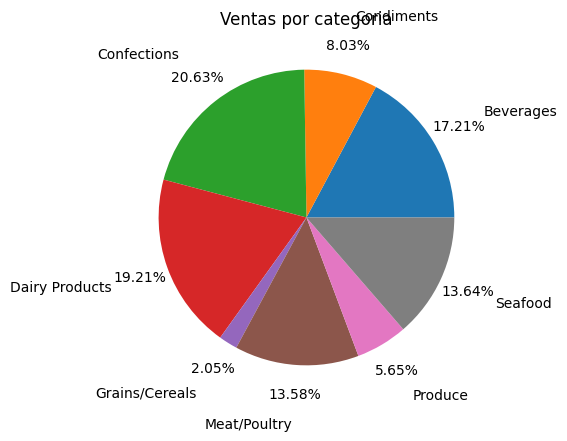

In [18]:
fig, maria = plt.subplots()
maria.pie(year_group1['Amount'], labels=year_group1['Category'], autopct='%.2f%%', pctdistance=1.2, labeldistance=1.4)
maria.set_title('Ventas por categoria')
plt.show()

PRACTICA 1: En un fichero nuevo de visual code. Primero guardar el DataFrame trimestre2, guardar un fichero .xlsx solamente de los pedidos cuya Categoria sea Seafood o Beverages, poner nombre de hoja 'Pedidos A'. Y despues leer en el nuevo fichero de visual. Crear un DataFrame que contenga el promedio de Amount - Discount agrupado por Ship Country. Guardar este fichero en formato csv separado por comas Crear un grafico, 'Promedio de Ventas por pais'

In [19]:
year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Discount      323 non-null    float64       
 1   Amount        323 non-null    float64       
 2   Order Date    323 non-null    datetime64[ns]
 3   Ship Country  323 non-null    object        
 4   Ship City     323 non-null    object        
 5   Customer      323 non-null    object        
 6   Quantity      323 non-null    int64         
 7   Unit Price    323 non-null    float64       
 8   Category      323 non-null    object        
 9   Product       323 non-null    object        
 10  Order ID      323 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 27.9+ KB


In [20]:
year_sea_bev = year[(year['Category'] == 'Seafood')|(year['Category'] == 'Beverages')]
file5 = 'Seafood_Beverages.xlsx'
year_sea_bev.to_excel(file5, sheet_name='Pedidos A', header=True, index=False)

In [22]:
year_prac1 = pd.read_excel('Seafood_Beverages.xlsx', sheet_name='Pedidos A')
year_prac1['Amount net'] = round(year_prac1['Amount'] - year_prac1['Discount'],2)
year_prac1 = round(year_prac1.groupby(['Ship Country'])['Amount net'].mean(),2)
print(type(year_prac1))
year_prac1 = pd.DataFrame(year_prac1, columns=['Amount net'])
print(type(year_prac1))
year_prac1 = year_prac1.reset_index()
year_prac1 = year_prac1.rename(columns={'Amount net': 'Mean Amo Net'})
year_prac1.to_csv('Country_Discount.csv', sep=',', index=False)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


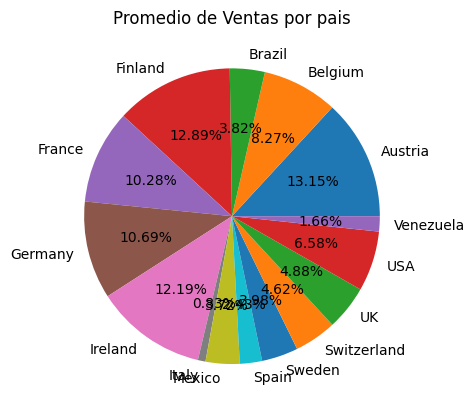

In [26]:
fig, ventas = plt.subplots()
ventas.pie(year_prac1['Mean Amo Net'], labels=year_prac1['Ship Country'], autopct='%.2f%%', labeldistance=1.1)
ventas.set_title('Promedio de Ventas por pais')
plt.show()

In [ ]:
(year['Category'] == 'Seafood')|(year['Category'] == 'Beverages')

0      False
1      False
2      False
3      False
4      False
       ...  
318    False
319     True
320     True
321    False
322     True
Name: Category, Length: 323, dtype: bool